In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast, time
from IPython.display import clear_output

In [2]:
conditions = ['A1', 'A2', 'A3', 'A4', 'A5', 
              'B1', 'B2', 'B3', 'B4', 'B5', 
              'C1', 'C2', 'C3']
ligands = ['OSM1','EGF1','EGF+TGFB1','TGFB1','PBS1',
           'OSM2','EGF2','EGF+TGFB2','TGFB2','PBS2',
           'OSM+EGF+TGFB','OSM+EGF','OSM+TGFB']
nfovs = 4
fovs = [i for i in range(1, nfovs+1)]
fovs = np.array(fovs).astype(int)
# Filename with path
filePath = '/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/crossCorrCCRnuc/'
sysName = 'LI204601_P'

In [3]:
# Cross correlations at all frame numbers (time points)
def get_cross_corr_all_frames(filename):
    cross_corr_data = []
    with open(filename, 'r') as file_in:
         for line in file_in:
             # Remove any leading/trailing whitespace
             line = line.strip()
             # If the line is not empty, convert it to a list and add to arrays
             if line:
                data = ast.literal_eval(line)
                cross_corr_data.append(data)
    corr_all_trajs = []
    for fi in range(0, len(cross_corr_data), 2):
        cross_corr = np.array(cross_corr_data[fi])
        corr_all_trajs.append(cross_corr)
    flat_cross_corr = np.concatenate(corr_all_trajs)
    return flat_cross_corr

In [4]:
# Cross correlations corresponding to a selected frame number (time)
def get_cross_corr_single_time_point(filename, frame_id):
    cross_corr_single_frame = []
    with open(filename, 'r') as file_in:
        # Create an iterator over the file lines 
        file_iter = iter(file_in)
        try:
            while True:
                # Read two lines at a time: Cross correlations & the corresponding frame numbers
                line1 = next(file_iter).strip()
                line2 = next(file_iter).strip()
                # Parse line2 as a list of integers
                frame_numbers = ast.literal_eval(line2)
                if frame_id in frame_numbers:  # if the desired frame id is present 
                    index = frame_numbers.index(frame_id)  # Find the index of frame_id in frame_numbers
                    if line1:
                        data = ast.literal_eval(line1)
                        cross_corr_single_frame.append(data[index])
        except StopIteration:
            # End of file reached
            pass
    corr_all_trajs_single_frame = np.array(cross_corr_single_frame)
    return corr_all_trajs_single_frame

<Figure size 640x480 with 0 Axes>

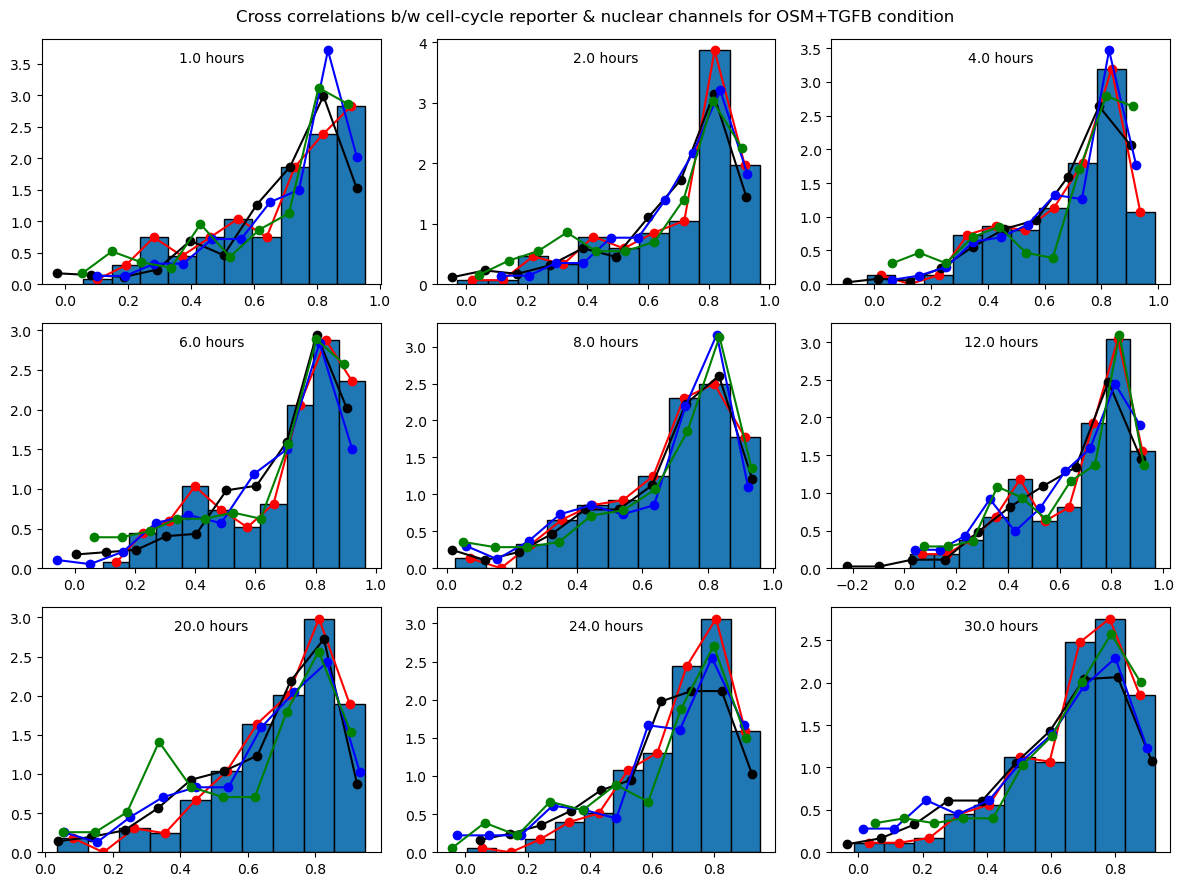

In [16]:
########## Visualize data from selected frames for one ligand condition ##########
ncond = len(conditions)
colors_fovs = ['red', 'black', 'blue', 'green']
colors_fovs = np.array(colors_fovs)
n_rows = 3; n_cols = 3
frames = [4, 8, 16, 24, 32, 48, 80, 96, 120]
frames = np.array(frames).astype(int)
time_hours = frames / 4 # Since the Data is collected 15 minutes interval
lig_cond_indc = 12
cond = conditions[lig_cond_indc] 
ligand_ = ligands[lig_cond_indc]
plt.clf()
fig, axs = plt.subplots(n_rows, n_cols, figsize = (12, 9))
#fig.suptitle(f'Cross correlations b/w cell-cycle reporter & nuclear channels at {time_hours} hours')
fig.suptitle(f'Cross correlations b/w cell-cycle reporter & nuclear channels for {ligand_} condition')
# Flatten the axs array for easy indexing
axs = axs.flatten()
for i, frame_id in enumerate(frames):
    for j, fov in enumerate(fovs):
        filename = filePath+sysName+'_'+cond+'_'+str(fov)+'.dat'
        cross_corr_model = get_cross_corr_single_time_point(filename, frame_id)
        n, bins = np.histogram(cross_corr_model, density = True)
        # Calculate the midpoints of the bins
        bin_midpoints = (bins[:-1] + bins[1:]) / 2
        if fov == 1:
            axs[i].bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')
        # Plotting the line plot over the bar plot
        axs[i].plot(bin_midpoints, n, color = colors_fovs[j], marker = 'o')
        #axs.set_xlabel('Cross correlations b/w cell-cycle reporter & nuclear channels')
        #axs.set_ylabel('Probability densities')         
    ligand_text = str(time_hours[i])+' hours'
    axs[i].text(0.5, 0.95, ligand_text, ha = 'center', va = 'top', transform = axs[i].transAxes)
# Hide any unused subplots
#for j in range(ncond, n_rows * n_cols):
#    axs[j].axis('off')   
fig.tight_layout()
#plt.show()
save_file = 'cross_corr_hist_'+ligand_+'.png'
plt.savefig(save_file, dpi = 300, bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

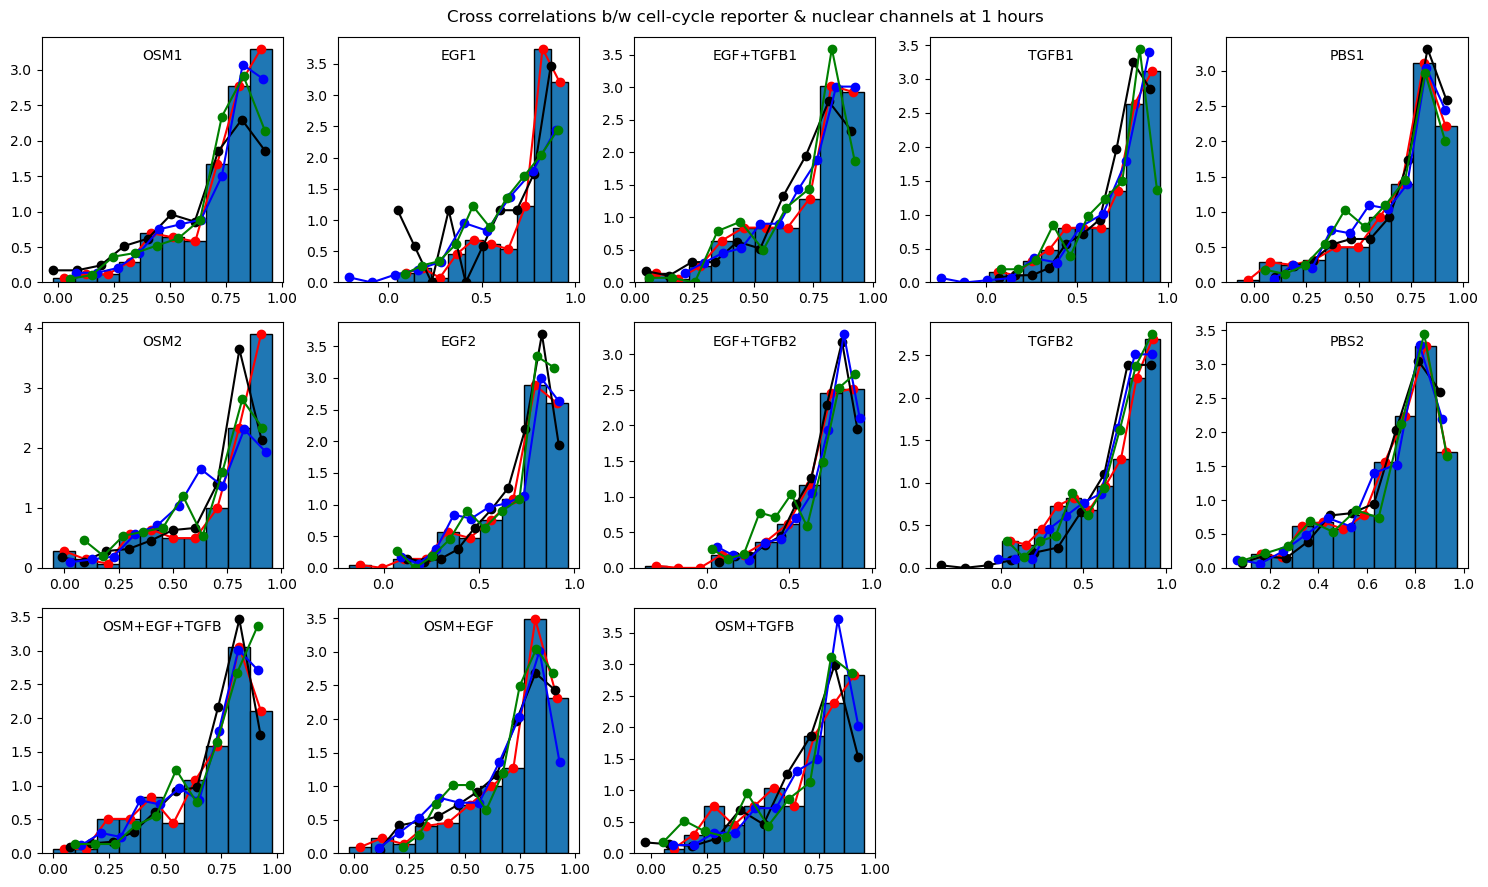

In [12]:
########## Visualize data from a selected frame across all conditions (Ligands) ##########
ncond = len(conditions)
colors_fovs = ['red', 'black', 'blue', 'green']
colors_fovs = np.array(colors_fovs)
n_rows = 3; n_cols = 5
frame_id = 4
time_hours = int(frame_id / 4) # Data is collected each 15 minutes 
plt.clf()
fig, axs = plt.subplots(n_rows, n_cols, figsize = (15, 9))
fig.suptitle(f'Cross correlations b/w cell-cycle reporter & nuclear channels at {time_hours} hours')
# Flatten the axs array for easy indexing
axs = axs.flatten()
for i, cond in enumerate(conditions):
    for j, fov in enumerate(fovs):
        filename = filePath+sysName+'_'+cond+'_'+str(fov)+'.dat'
        cross_corr_model = get_cross_corr_single_time_point(filename, frame_id)
        n, bins = np.histogram(cross_corr_model, density = True)
        # Calculate the midpoints of the bins
        bin_midpoints = (bins[:-1] + bins[1:]) / 2
        if fov == 1:
            axs[i].bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')
        # Plotting the line plot over the bar plot
        axs[i].plot(bin_midpoints, n, color = colors_fovs[j], marker = 'o')
        #axs.set_xlabel('Cross correlations b/w cell-cycle reporter & nuclear channels')
        #axs.set_ylabel('Probability densities')         
    ligand = ligands[i]
    axs[i].text(0.5, 0.95, ligand, ha = 'center', va = 'top', transform = axs[i].transAxes)
# Hide any unused subplots
for j in range(ncond, n_rows * n_cols):
    axs[j].axis('off')   
fig.tight_layout()
#plt.show()
save_file = 'cross_corr_hist-'+str(frame_id)+'.png'
plt.savefig(save_file, dpi = 300, bbox_inches = 'tight')

In [ ]:
################### Visualize data from all frames & conditions ###################
ncond = len(conditions)
colors_fovs = ['red', 'black', 'blue', 'green']
colors_fovs = np.array(colors_fovs)
n_rows = 3; n_cols = 5
plt.clf()
fig, axs = plt.subplots(n_rows, n_cols, figsize = (15, 9))
# Flatten the axs array for easy indexing
axs = axs.flatten()
for i, cond in enumerate(conditions):
    for j, fov in enumerate(fovs):
        filename = filePath+sysName+'_'+cond+'_'+str(fov)+'.dat'
        cross_corr_model = get_cross_corr_all_frames(filename)
        n, bins = np.histogram(cross_corr_model, density = True)
        # Calculate the midpoints of the bins
        bin_midpoints = (bins[:-1] + bins[1:]) / 2
        if fov == 1:
            axs[i].bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')
        # Plotting the line plot over the bar plot
        axs[i].plot(bin_midpoints, n, color = colors_fovs[j], marker = 'o')
        #axs.set_xlabel('Cross correlations b/w cell-cycle reporter & nuclear channels')
        #axs.set_ylabel('Probability densities')         
    ligand = ligands[i]
    axs[i].text(0.5, 0.95, ligand, ha = 'center', va = 'top', transform = axs[i].transAxes)
# Hide any unused subplots
for j in range(ncond, n_rows * n_cols):
    axs[j].axis('off')   
fig.tight_layout()
#plt.show()
plt.savefig('cross_corr_hist.png', dpi = 300, bbox_inches = 'tight')